<a href="https://colab.research.google.com/github/NataliaArenasP20/LaboratorioBiosenales/blob/main/Practica_3/P3_NataliaArenas_DanielTamayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#Práctica 3**
### Natalia Arenas Pachón - 1007729698
### Daniel Tamayo - 1214747121

### **Análisis estadístico de ECG**



In [88]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [89]:
import os
directorio_Actual = os.getcwd()
print(directorio_Actual)  # Imprime el directorio actual

e:\ACTUAL\BIOSIGNALS\GIT\LaboratorioBiosenales\Practica_3


Se realiza la carga de los archivos que contienen las señales.

Se toman 2 conjuntos de datos, la señal cruda (ECG) y esta misma señal filtrada (ECG_filtrada).

In [120]:
# Cargo el archivo signals.mat desde el directorio local
#signal = sio.loadmat("C:/Users/natal/OneDrive/Escritorio/LaboratorioBiosenales/Practica_3/signals.mat")
signal = sio.loadmat("signals.mat")

# Ver las llaves del archivo
print(signal.keys())

# Cargar las señales ECG
ECG = signal['ECG_asRecording']
ECG_filtrada = signal['ECG_filtered']

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


Se realiza una función para hallar el valor RMS según la ecuación brindada.
Ref: https://dsp.stackexchange.com/questions/42059/difference-between-rms-and-a-moving-rms

In [91]:
def RMS(s): #Función RMS con argumento s
    size=s.size #se obtiene el número de datos y se guarda en size

    #Genero una variable vacía para el valor RMS
    RMS=0

    #Genero un ciclo for que va a recorrer los elementos de la señal
    for i in range(0,size-1):
        RMS+=s[0,i]**2
        #Permite calcular el cuadrado medio de la señal mediante un contador que 
        # sería el sumador de la ecuación y se agrega a la variable RMS

    #Ahora aplico el 1/N * RMS elevado a la 1/2(raiz)
    RMS_out=np.sqrt(1/size*RMS) #size es el número N de muestras 

    #Retorno, se emplea el round con el fin de tomar 4 cifras decimales
    return np.round(RMS_out,3)

RMS(ECG) #Calcula el RMS de la señal ECG


np.float64(4392.898)

1. A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo

# Creación vectores de tiempo de las señales

In [92]:
#Tamaño de cada señal
size_ECG = ECG.size
size_ECG_filtrada = ECG_filtrada.size

#Frecuencia de muestreo definida de 1024 HZ
fec_muestreo = 1024

#Periodo Hz^-1= s
periodo = 1/fec_muestreo

#Longitud de tiempo de cada señal usando el periodo
time_ECG = periodo*size_ECG
time_ECG_filtrada = periodo*size_ECG_filtrada

#Vector de tiempo para cada señal
vector_ECG = np.arange(0,time_ECG,periodo)
#print('Vector ECG:',vector_ECG)
vector_ECG_filtrada = np.arange(0,time_ECG_filtrada,periodo)
#print('Vector ECG filtrada:',vector_ECG_filtrada)

2. Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser 
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

# Se observan las señales importadas

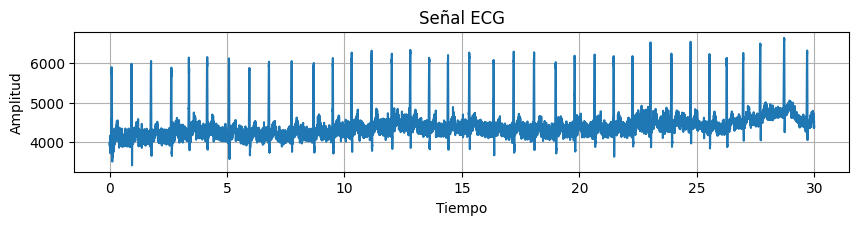

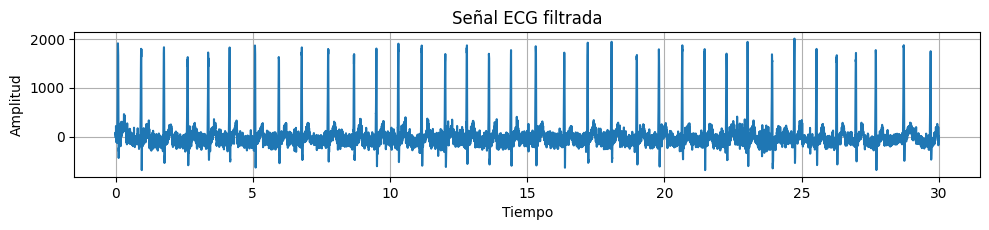

In [93]:
#Grafica señal ECG
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(vector_ECG, ECG.T)
plt.title('Señal ECG')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

#Grafica señal ECG filtrada
plt.figure(figsize=(10,4))
plt.subplot(212)
plt.plot(vector_ECG_filtrada, ECG_filtrada.T)
plt.title('Señal ECG filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

plt.tight_layout()
plt.show()

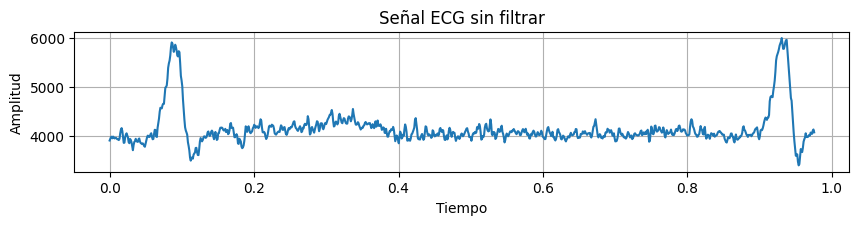

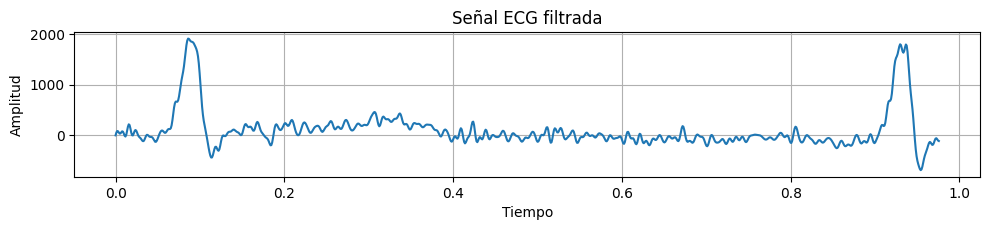

In [94]:
#Filtro pasa bajas
#Señal sin filtrar
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(vector_ECG[:1000],ECG.T[:1000])
plt.title('Señal ECG sin filtrar')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

#señal filtrada
plt.figure(figsize=(10,4))
plt.subplot(212)
plt.plot(vector_ECG_filtrada[:1000],ECG_filtrada.T[:1000])
plt.title('Señal ECG filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

plt.tight_layout()
plt.show()

# Las señales obtenidas por las máquinas de electrocardiografía actuales registran informmación entre los 0.5 y los 150 Hz, por lo cuál se deben aplicar filtros pasabandas que restrinjan los datos a este rango. Además, se debe aplicar un filtro de red que elimine el ruido correspondiente a los 60Hz.
Ref: Tereshchenko LG, Josephson ME. Frequency content and characteristics of ventricular conduction. J Electrocardiol. 2015 Nov-Dec;48(6):933-7. doi: 10.1016/j.jelectrocard.2015.08.034. Epub 2015 Aug 28. PMID: 26364232; PMCID: PMC4624499.

 3. Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el 
promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\1816503841.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c1=ECG.T[int(start_c1):int(stop_c1)].T
C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\1816503841.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(vector_ECG[int(start_c1)-10:int(stop_c1)+10],ECG.T[int(start_c1)-10:int(stop_c1)+10])
C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\1816503841.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.

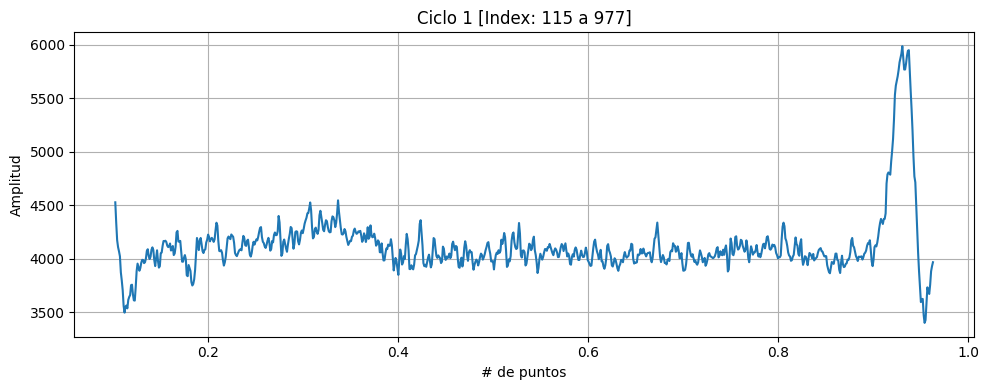

Para un ciclo de la señal sin filtrar se tiene:
Promedio: 4126.125861006381 
Varianza: 90477.87798559437 
Desviación estándar: 300.7954088505913 
RMS:  4135.385


In [95]:
#Señal sin filtrar
start_c1,__=np.where(ECG.T==np.min(ECG.T[:500]))

stop_c1,__=np.where(ECG.T==np.min(ECG.T[700:1000]))
c1=ECG.T[int(start_c1):int(stop_c1)].T

plt.figure(figsize=(10,4))
plt.plot(vector_ECG[int(start_c1)-10:int(stop_c1)+10],ECG.T[int(start_c1)-10:int(stop_c1)+10])
plt.title("Ciclo 1 [Index: "+str(int(start_c1))+" a "+str(int(stop_c1))+"]")
plt.xlabel("# de puntos")
plt.ylabel("Amplitud")
plt.grid()
plt.tight_layout()
plt.show()

valor_rms = RMS(c1)
valor_desviacion = c1.std()
valor_varianza = c1.var()
valor_promedio = c1.mean()
print("Para un ciclo de la señal sin filtrar se tiene:\nPromedio: "+str(valor_promedio)+" \nVarianza: "+str(valor_varianza)+" \nDesviación estándar: "+str(valor_desviacion)+" \nRMS:  "+str(valor_rms))

# El valor promedio si bien se ve alterado por la onda más alta del ciclo, es representativo de la energía de la señal, al igual que el RMS. A su vez se observa un  considerables de varianza lo indica que los datos de la señal están muy dispersos alrededor de su valor medio. Por último la desviación estándar no supera el 10%, lo que en el contexto de ECG es coherente con la naturaleza de los datos

4.  Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados 
obtenidos en el ítem anterior. 

C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\854910030.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cf1 = ECG_filtrada.T[int(start_cf1):int(stop_cf1)].T
C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\854910030.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(vector_ECG_filtrada[int(start_cf1)-10:int(stop_cf1)+10],ECG_filtrada.T[int(start_cf1)-10:int(stop_cf1)+10])
C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\854910030.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this 

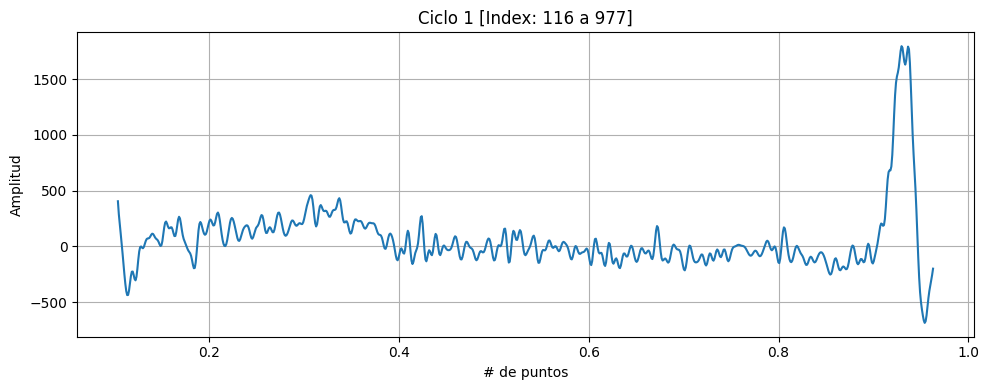

Para un ciclo de la señal filtrada se tiene:
Promedio: 65.04132316737679 
Varianza: 85869.9381326166 
Desviación estándar: 293.03572842337263 
RMS:  299.313


In [96]:
#Señal filtrada
start_cf1,__ = np.where(ECG_filtrada.T==np.min(ECG_filtrada.T[:500]))

stop_cf1,__ = np.where(ECG_filtrada.T==np.min(ECG_filtrada.T[700:1000]))

cf1 = ECG_filtrada.T[int(start_cf1):int(stop_cf1)].T

plt.figure(figsize=(10,4))
plt.plot(vector_ECG_filtrada[int(start_cf1)-10:int(stop_cf1)+10],ECG_filtrada.T[int(start_cf1)-10:int(stop_cf1)+10])
plt.title("Ciclo 1 [Index: "+str(int(start_cf1))+" a "+str(int(stop_cf1))+"]")
plt.xlabel("# de puntos")
plt.ylabel("Amplitud")
plt.grid()
plt.tight_layout()
plt.show()

valor_rmsf = RMS(cf1)
valor_desviacionf = cf1.std()
valor_varianzaf = cf1.var()
valor_promediof = cf1.mean()
print("Para un ciclo de la señal filtrada se tiene:\nPromedio: "+str(valor_promediof)+" \nVarianza: "+str(valor_varianzaf)+" \nDesviación estándar: "+str(valor_desviacionf)+" \nRMS:  "+str(valor_rmsf))

# En este caso, el valor promedio no resulta representativo ya que la señal tiene valores en negativos en el eje ordenado. Se muestran menor varianza y desviación estándar provenientes del filtrado realizado. El valor RMS al igual que los picos y energía de la señal disminuyeron, producto de la eliminación de datos que representan ruido y aumentan la amplitud de la señal.

C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\4162882050.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(vector_ECG[int(start_c1)-10:int(stop_c1)+10],ECG.T[int(start_c1)-10:int(stop_c1)+10], label='Señal sin filtrar', color='blue')
C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\4162882050.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(vector_ECG_filtrada[int(start_cf1)-10:int(stop_cf1)+10],ECG_filtrada.T[int(start_cf1)-10:int(stop_cf1)+10], label='Señal filtrada', color='orange')


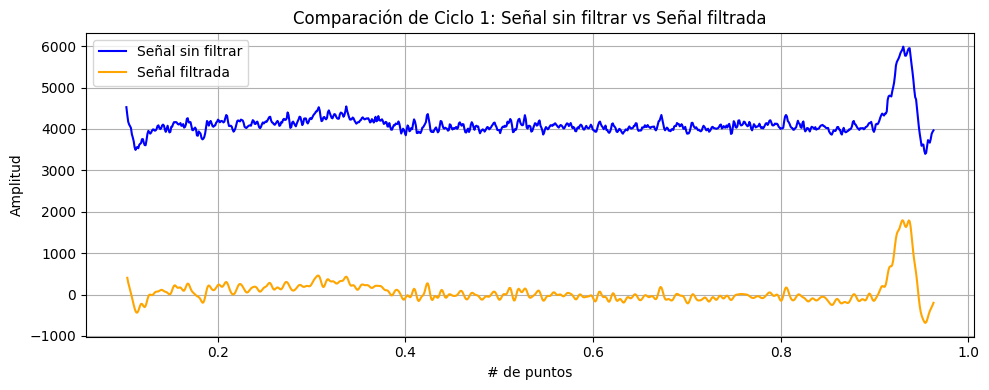

In [97]:
# Graficar ambas señales en una sola gráfica
plt.figure(figsize=(10, 4))

# Graficar la señal sin filtrar
plt.plot(vector_ECG[int(start_c1)-10:int(stop_c1)+10],ECG.T[int(start_c1)-10:int(stop_c1)+10], label='Señal sin filtrar', color='blue')

# Graficar la señal filtrada
plt.plot(vector_ECG_filtrada[int(start_cf1)-10:int(stop_cf1)+10],ECG_filtrada.T[int(start_cf1)-10:int(stop_cf1)+10], label='Señal filtrada', color='orange')
plt.title("Comparación de Ciclo 1: Señal sin filtrar vs Señal filtrada")
plt.xlabel("# de puntos")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

##Agregar comentario

5.  Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?


In [98]:
ciclos=np.zeros((15,3))

def gen_ciclos(sig,start,stop): #Recibe la señal, donde inicia y donde se para
    signal=sig.T
    
    #Tomaré el inicio del ciclo
    sta,__=np.where(signal==np.min(signal[start:stop-300]))
    
    #Tomaré el final del ciclo
    sto,__=np.where(signal==np.min(signal[start+300:stop]))
    
    #Genero el ciclo
    #print("Inicia en "+str(sta)+" y termina en "+str(sto))
    ciclo=signal[int(sta):int(sto)]
    return ciclo

C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\3165383536.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ciclo=signal[int(sta):int(sto)]


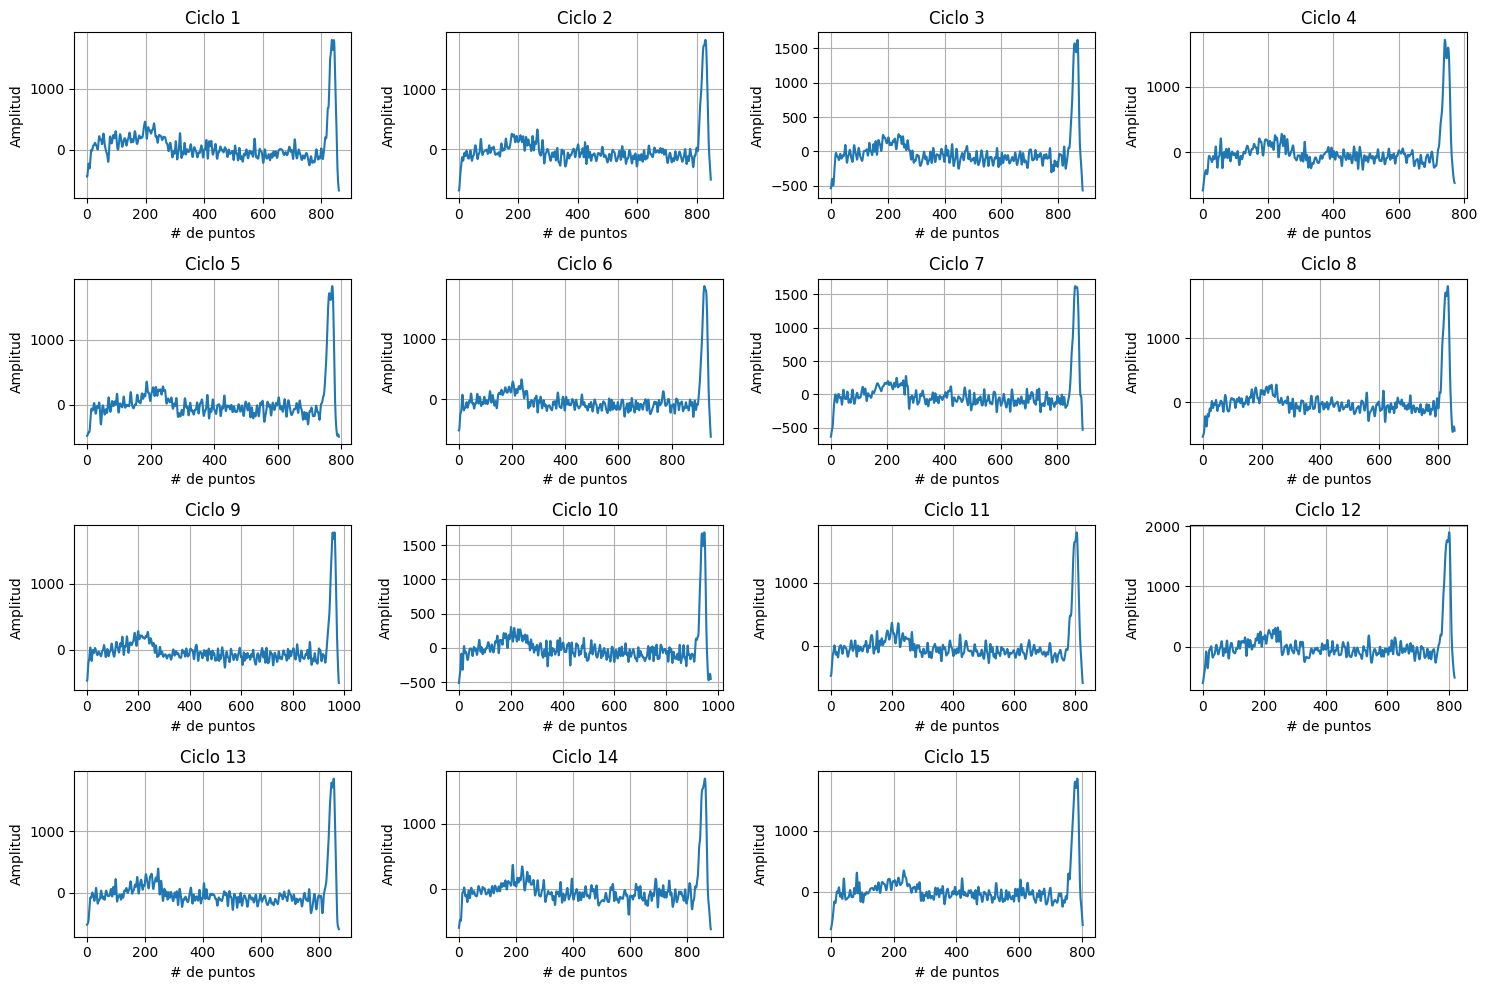

        Media  Desviación estándar  Tamaño de ciclo
0   65.041323           293.035728            861.0
1  -11.626742           291.425963            848.0
2  -17.205006           269.516542            887.0
3    2.113206           286.932888            773.0
4   20.355508           301.860671            793.0
5  -12.962906           282.487981            948.0
6   -0.865674           263.666206            891.0
7    5.629693           290.224449            857.0
8   -6.100573           269.155039            980.0
9    3.027448           258.574975            973.0
10  -1.713483           283.582569            827.0
11  10.306933           304.115536            819.0
12  -4.619220           297.422165            870.0
13 -14.946859           275.895721            883.0
14  27.451546           297.154065            803.0


In [99]:
# Matriz para almacenar los datos (media, desviación estándar, tamaño de cada ciclo)
datos = np.zeros((15, 3))

# Crear una figura para los subplots 4x4
fig, axs = plt.subplots(4, 4, figsize=(15, 10))

# Listas para almacenar los ciclos y los intervalos
cicles = []
intervalos = [(0, 1000), (800, 2000), (1700, 3000), (2500, 3600), (3300, 4300), (4100, 5300), 
              (5100, 6300), (6100, 7400), (6500, 8000), (7800, 9100), (8700, 10000), 
              (9700, 11000), (10000, 11500), (11000, 12600), (12200, 13500)]

# Extraer y graficar los primeros 15 ciclos
for i, (start, stop) in enumerate(intervalos[:15]):
    ciclo = gen_ciclos(ECG_filtrada, start, stop)
    cicles.append(ciclo)
    
    # Posiciones en el subplot
    row = i // 4
    col = i % 4
    
    # Graficar en el subplot correspondiente
    axs[row, col].plot(ciclo)
    axs[row, col].grid(True)
    axs[row, col].set_title(f'Ciclo {i+1}')
    axs[row, col].set_xlabel("# de puntos")
    axs[row, col].set_ylabel("Amplitud")
    
    # Guardar la información de cada ciclo
    datos[i, 0] = ciclo.mean()
    datos[i, 1] = ciclo.std()
    datos[i, 2] = ciclo.size

for j in range(15, 16):
    row = j // 4
    col = j % 4
    axs[row, col].axis('off')  # Ocultar el subplot

plt.tight_layout()
plt.show()

#Crear un DataFrame con los datos
df = pd.DataFrame(datos, columns=["Media", "Desviación estándar", "Tamaño de ciclo"])

#Mostrar la tabla de los datos
print(df)


# A pesar de tener una media variable, producto de los valores negativos de la señal en cada ciclo, se puede observar en primera instancia que el comportamiento en cada uno de los mismos es muy similar, la desviación estándar está en un rango entre 258 y 304 aproximadamente y el tamaño de los ciclos cardíacos ronda entre 770 y 980 muestras. Estadísticamente no se conservan los valores representativos de la señal, pero fisiologicamente durante el intervalo de tiempo estudiado, y teniendo en cuenta la naturaleza de la señal, se puede presumir un estado estacionario general en cuanto a que no hay cambios fisiológicamente significativos en los datos,

6.  Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine 
estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios 
para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos 
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la 
estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico 
(prueba U de Mann-Whitney).

C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\3165383536.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ciclo=signal[int(sta):int(sto)]


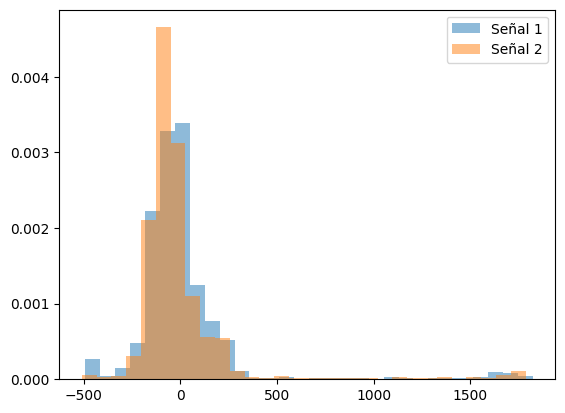

In [112]:

from scipy import stats
senal1=gen_ciclos(ECG_filtrada,3300,4300)  # CICLO 5
senal2=gen_ciclos(ECG_filtrada,6500,8000)  # CLICO 9

# Visualizar los datos
plt.hist(senal1, bins=30, density=True, alpha=0.5, label='Señal 1')
plt.hist(senal2, bins=30, density=True, alpha=0.5, label='Señal 2')
plt.legend(loc='upper right')
plt.show()



In [113]:

#Prueba de normalidad para ciclo 5
_, p_value = stats.normaltest(senal1)
print("Valor p:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Los datos no provienen de una distribucion normal")
else:
    print("Los datos provienen de una distribucion normal")


#Prueba de normalidad para ciclo 9
c9f=gen_ciclos(ECG_filtrada,6500,8000)
_, p_value = stats.normaltest(senal2)
print("Valor p:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Los datos no provienen de una distribucion normal")
else:
    print("Los datos provienen de una distribucion normal")



Valor p: [5.0709436e-148]
Los datos no provienen de una distribucion normal
Valor p: [4.80230353e-207]
Los datos no provienen de una distribucion normal


C:\Users\tamay\AppData\Local\Temp\ipykernel_24704\3165383536.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ciclo=signal[int(sta):int(sto)]


# La distribución cuenta con asimetría positiva, además una parte de los datos toma valores muy alejados de la moda, por lo cual la normalidad no se cumple.

In [114]:

#Prueba de homocedasticidad
levene_test, p_value = stats.levene(np.squeeze(senal1), np.squeeze(senal2), center='median')
levene_test
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Las varianzas son diferentes")
else:
    print("Las varianzas son iguales")


Valor p: 0.042847117526184246
Las varianzas son diferentes


# Dado que las varianzas son diferentes, no se cumple el supuesto de homocedasticidad. Los datos de una de las señales están más extendidos.

In [117]:
#Prueba de independencia
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(senal1, senal2)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("La diferencia entre medianas es estadísticamente significativa")
else:
    print("La diferencia entre medianas no es estadísticamente significativa")


Valor p: [5.50396104e-06]
La diferencia entre medianas es estadísticamente significativa


Se asume independencia, esta prueba indica que existen diferencias entre los ciclos

7.  Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal 
(Estacionariedad)

In [126]:
#Prueba estacionariedad
# La Ho representa la No estacionariedad de la señal.
# Rechazar H0: Si se rechaza la hipótesis nula, se concluye que la serie no tiene una raíz unitaria y, por lo tanto, es estacionaria.
# No rechazar H0: Si no se rechaza la hipótesis nula, se concluye que la serie tiene una raíz unitaria y, por lo tanto, no es estacionaria.

from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller test
prueba_Dickey = adfuller(ECG.T)
if prueba_Dickey[1] < 0.05:
    print("La señal sin filtrar es estacionaria")  
    print(prueba_Dickey)  
else:
    print("La señal sin filtrar NO es estacionaria")
    print(prueba_Dickey) 

#Dickey-Fuller test para señal filtrada
prueba_Dickey = adfuller(np.squeeze(ECG_filtrada))
if prueba_Dickey[1] < 0.05:
    print("La señal filtrada es estacionaria")    
    print(prueba_Dickey) 
else:
    print("La señal filtrada NO es estacionaria")  
    print(prueba_Dickey)   

La señal sin filtrar es estacionaria
(np.float64(-16.443181171303177), np.float64(2.4170027215533068e-29), 51, 30668, {'1%': np.float64(-3.4305632466228713), '5%': np.float64(-2.8616342493185662), '10%': np.float64(-2.5668201660230157)}, np.float64(321415.48849438573))
La señal filtrada es estacionaria
(np.float64(-26.612452975209546), 0.0, 19, 30700, {'1%': np.float64(-3.4305630243276717), '5%': np.float64(-2.861634151073544), '10%': np.float64(-2.5668201137295887)}, np.float64(-592096.8539292417))


# La prueba Dickey-Fuller se implementa mediante la función addfuller, que nos retorna valores estadísticos dentro de los cuales el valor p nos indica la estacionariedad de los datos al compararla con el valor de alfa = 0.05 (nivel de significancia estándar.) En este caso, se rechaza la hipótesis nula, indicando estacionariedad. Consideramos que puede existir un error en dado el análisis previo de los ciclos de la señal, sin embargo, asumiendo que esta prueba fue correctamente realizada, los resultados arrojan que el comportamiento y distribución de los datos del ECG son lo suficientemente estables para mantener sus estadísticos (media varianza y autocorrelación) sobre los mismos valores a lo largo del tiempo/muestreo.

refs: 

https://www.statology.org/dickey-fuller-test-python/

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

https://stackoverflow.com/questions/47349422/how-to-interpret-adfuller-test-results